# Statistical Power

## Introduction

Statistical power is a measure of a test's ability to detect an effect/difference when an effect/difference actually exists. 

We have already discussed how the null hypothesis significance testing (NHST) procedure, when followed rigorously, offers control over the false positive rate: how often we will detect a difference when one does not, in reality, exist.  Power addresses the other side of the question, how often will we detect a difference when one really does exist?

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
import scipy.stats as stats

## Basic

### Part 1: Introduction to Power

A common application domain for NHST is in [manufacturing control](https://en.wikipedia.org/wiki/Statistical_process_control).  When we have a plant that produces a certain object, we want to develop automatic processes that will alert us when we begin manufacturing objects outside of normal tolerances.

Suppose you are a manufacturing engineer in charge of a plant that manufactures bottles of [Coca-Cola](https://en.wikipedia.org/wiki/Coca-Cola).  Each bottle of Coca-Cola should weigh 20.4 ounces (20 ounces of product, 0.4 ounces of bottle).  Of course, due to random fluctuations, bottles will not weigh *exactly* 20.4 ounces, but we do not want to be manufacturing bottles that systematically weigh more or less than this target amount.

The management of Coca-Cola have set a standard that bottles should weigh, on average, within 0.1 ounces of this target.  You have collected a sample of bottles manufactured at your plant, and your goal for the day is to test if your plant is manufacturing bottles within the company's tolerances.

You have collected a simple random sample of 130 bottles of coke from your plant, and weighed them.

In [91]:
#n = 130, alpha = 0.1

1. Load the data in with `numpy.loadtxt('data/coke_weights.txt')`.  Visualize the data with either a scatterplot (with jitter) or a histogram.  Does it look like there is cause for concern?

In [92]:
a=np.loadtxt('data/coke_weights.txt')

(array([ 6.,  0.,  4.,  3.,  1.,  5.,  5.,  6., 12.,  6.,  5.,  4., 12.,
         8.,  0.,  1.]),
 array([19.   , 19.125, 19.25 , 19.375, 19.5  , 19.625, 19.75 , 19.875,
        20.   , 20.125, 20.25 , 20.375, 20.5  , 20.625, 20.75 , 20.875,
        21.   ]),
 <a list of 16 Patch objects>)

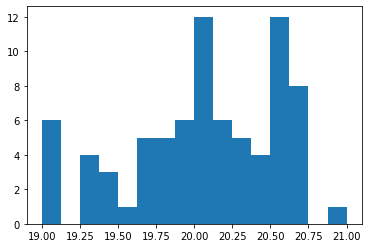

In [93]:
#There is cause for concern. THere is bottles WAY outside 20.4 ounces.
x = np.linspace(19.0,21.0, num=17)
plt.hist(a,x)

2. You would like to design a NHST that will notify you when bottles are being manufactured that systematically differ from 20.4 ounces.  State a null hypothesis appropriate for the problem.

In [94]:
#H0: Bottles weigh within 0.1 ounces of target 20.4 ounces
#Bootstrapping
sample_data0 = np.zeros(len(a))

In [95]:
sample_data1 = np.random.choice(a, size=(len(a),1000), replace=True)
sample_data1
Sample_Data_mean = np.mean(sample_data1,axis=0)

In [96]:
st = np.std(a)
st

0.9576822151041886

In [97]:
Sample_Data_mean

array([20.42566909, 20.35402251, 20.690382  , 20.60113416, 20.46816015,
       20.37587454, 20.38481514, 20.38642711, 20.56155625, 20.50978194,
       20.52058073, 20.47362742, 20.51278643, 20.64453331, 20.45837583,
       20.41481572, 20.6196284 , 20.59759345, 20.43053109, 20.48104738,
       20.58498601, 20.5007089 , 20.50988785, 20.63788553, 20.58344573,
       20.47871162, 20.53171866, 20.55541491, 20.62126001, 20.52051472,
       20.37411816, 20.58091147, 20.51478583, 20.49739223, 20.57436993,
       20.57167095, 20.45855525, 20.62021592, 20.42138877, 20.59395667,
       20.49775239, 20.54052182, 20.45567732, 20.42052808, 20.50608481,
       20.47183544, 20.58113176, 20.55032474, 20.42251366, 20.54045282,
       20.56193859, 20.54322403, 20.56554074, 20.5863443 , 20.36894983,
       20.520674  , 20.51445733, 20.51752597, 20.56944792, 20.47803586,
       20.40718807, 20.3993259 , 20.6466922 , 20.54911709, 20.52355288,
       20.5145245 , 20.61614378, 20.67020924, 20.42640054, 20.68

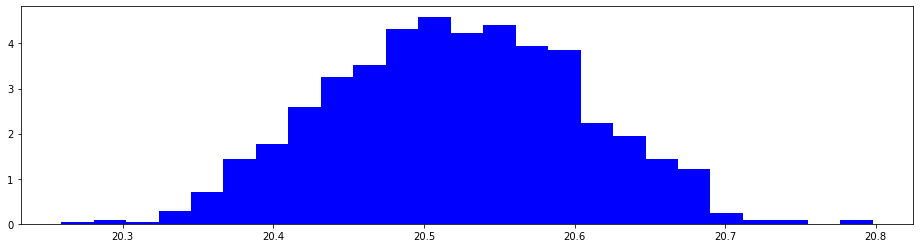

In [98]:
fig, ax = plt.subplots(1, figsize=(16, 4))
_ = ax.hist(Sample_Data_mean, bins=25, density=True, color="blue",
            label="Sample Data")

3. State an alternate hypothesis.  Is a one tailed or two tailed test appropriate for your goals? Hint: pretend you haven't looked at the data yet.

In [99]:
#H1: Bottles 'will not' weigh within on average 0.1 ounces of target 20.4 ounces
#Two-tailed test is most appropriate for your goals

4. What is the distribution of your sample average under the null hypothesis assumption?  What result tells you this?

In [100]:
#We want the distribution of our sample average under null hypothesis assumption to fall under
#"Normal Distribution" due sample size is larger than 30. The results of sample mean 

5. Use `scipy` to make a random variable of the sampling distribution of the mean under the null hypothesis. Plot the PDF over `+/- 4 standard error`. 

In [101]:
std_err = st/((130)**(1/2))
std_err

0.0839942866704848

In [114]:
sample_mean_a = np.mean(a)

In [115]:
null_hypothesis_dist = stats.norm(20.4,std_err)

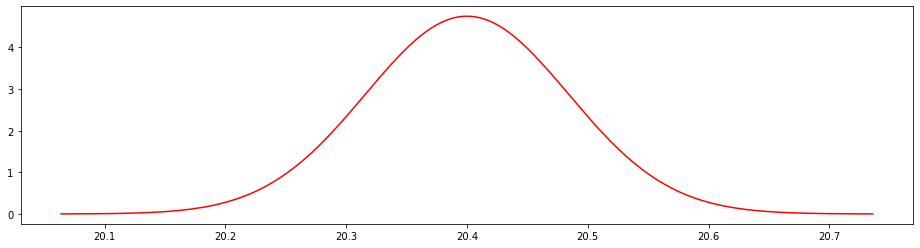

In [116]:
x_ = np.linspace(20.4-4*std_err,20.4+(4*std_err), num=250)
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_, null_hypothesis_dist.pdf(x_),color="red",
            label="DIST of Null Hypothesis")

6. According to company standards, we would like our test to detect when the mean of our manufactured bottles is 0.1 ounce more than the desired mean of 20.4 (the *more than* is a simplifying assumption, which allows us to focus on a one tailed test).  Plot the sampling distribution of the data under the *alternate* hypothesis that the mean is `20.4 + 0.1`.

In [117]:
alternate_hypothesis_dist = stats.norm(20.4 + 0.1,std_err)

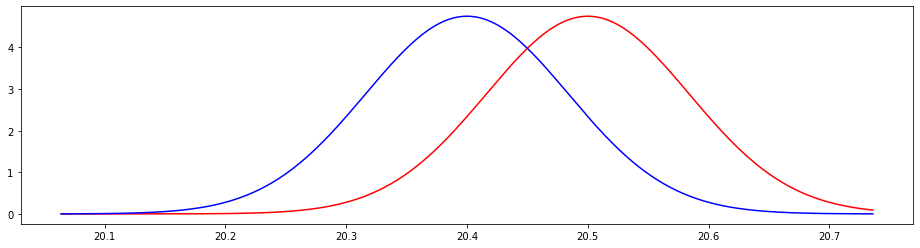

In [118]:
x_ = np.linspace(20.4-4*std_err,20.4+(4*std_err), num=250)
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_, alternate_hypothesis_dist.pdf(x_),color="red",
            label="DIST of Null Hypothesis")
ax.plot(x_, null_hypothesis_dist.pdf(x_),color="blue",
            label="DIST of Null Hypothesis")

7. Plot a vertical line to indicate the bounds for rejecting the null hypothesis assuming a significance level of 0.05. Based on the bounds for rejecting the null, what conclusion
can we draw based on the sample of 130 bottles of Coca-Cola?

![Two Sided Coke Bottle Rejection Reigon](images/h0-ha-coke-bottle-two-sided.png)

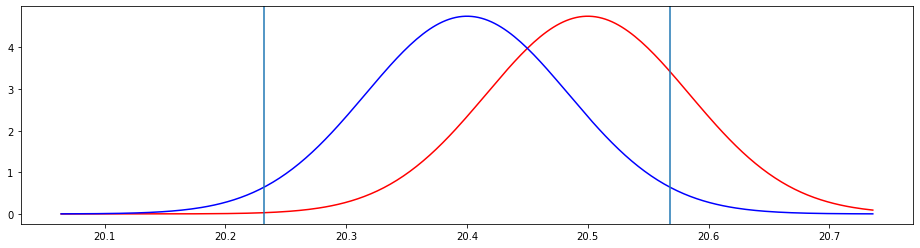

In [119]:
x_ = np.linspace(20.4-4*std_err,20.4+(4*std_err), num=250)
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_, alternate_hypothesis_dist.pdf(x_),color="red",
            label="DIST of Null Hypothesis")
ax.plot(x_, null_hypothesis_dist.pdf(x_),color="blue",
            label="DIST of Null Hypothesis")
ax.axvline(20.4-2*std_err)
ax.axvline(20.4+2*std_err)

8. Build a 95% confidence interval based on the sample data. Does your interval suggest that the weight of a bottle of coke is different than 20.4 ounces? Explain what a false negative is in the context of this problem.

In [120]:
sample_mean_a+2*std_err

20.687850014363576

In [121]:
sample_mean_a-2*std_err

20.351872867681635

In [122]:
#sample_mean_a-2*std_err represents the false negative where bottle weight falls in Null hypothesis

9. Compute the power of the test to detect that your process is manufacturing bottles which are, on average, overweight by 0.1 ounces.  Shade the area under the alternate hypothesis distribution that indicates the power of the test.

In [128]:
critical_value1 = alternate_hypothesis_dist.ppf(0.95)
critical_value2 = null_hypothesis_dist.ppf(0.95)
power = 1 - alternate_hypothesis_dist.cdf(critical_value1)
power_n = 1 - null_hypothesis_dist.cdf(critical_value2)

In [129]:
print("Power of Test (Alternate Hypothesis): {:2.2f}".format(power))

Power of Test (Alternate Hypothesis): 0.05


In [130]:
print("Power of Test (Null Hypothesis): {:2.2f}".format(power_n))

Power of Test (Null Hypothesis): 0.05


In [138]:
print(x_.shape)

(250,)

In [140]:
alternate_hypothesis_dist.pdf(x_).shape

(250,)

In [141]:
null_hypothesis_dist.pdf(x_).shape

(250,)

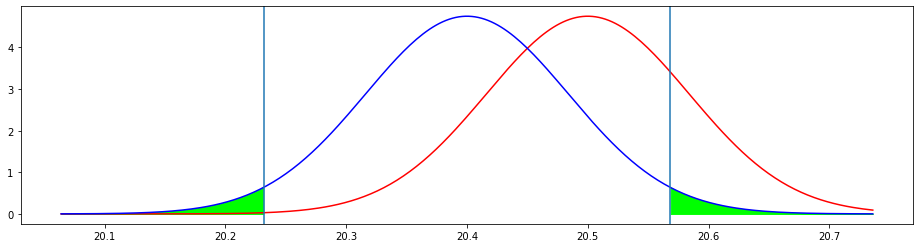

In [145]:
#x_ = np.linspace(20.4-4*std_err,20.4+(4*std_err), num=250)
fig, ax = plt.subplots(figsize=(16, 4))
ax.plot(x_, alternate_hypothesis_dist.pdf(x_),color="red",
            label="DIST of Null Hypothesis")
ax.plot(x_, null_hypothesis_dist.pdf(x_),color="blue",
            label="DIST of Null Hypothesis")
ax.fill_between(x_, null_hypothesis_dist.pdf(x_), 
                where=(x_ <=20.4-2*std_err), color="lime")
ax.fill_between(x_, null_hypothesis_dist.pdf(x_), 
                where=(x_ >=20.4+2*std_err), color="lime")
ax.axvline(20.4-2*std_err)
ax.axvline(20.4+2*std_err)

## Advanced

### Part 2: Factors that Influence Power of a Test

Statistical power is affected by a number of factors, including the **sample
size**, the **effect size you wish to detect**, the amount of **variance** in
the population, and the desired **significance level** of the test. Here we are
going to explore the effect of these factors on power.

<br>

1. Write a function `compute_power` that includes all the steps in `Part 1`.  Test it by using it to re-compute the power from `Part 1`.

```
def compute_power(n, sigma, alpha, mu0, mua):
    """Compute the statistical power of a standard z-test.

    Parameters
    ----------

    n: int
      Sample size.  Must be a positive number.

    sigma: float
      Population standard deviation.  Must be a positive number.

    alpha: float
      Significance level.  Must be between zero and one.

    mu0: float
      Assumed population mean under the null hypothesis.

    mua: float
      Assumed population mean under the alternate hypothesis.
    """
```

In [148]:
def compute_power(n, sigma, alpha, mu0, mua):
    standard_error = sigma / n**0.5
    h0 = stats.norm(mu0, standard_error)
    ha = stats.norm(mua, standard_error)
    critical_value = h0.ppf(1 - alpha)
    power = 1 - ha.cdf(critical_value)
    return power

In [149]:
print(compute_power(130,std_err,0.1,20.4,20.5))

1.0


2. Let's call the difference between `mua` and `mu0` the **hypothesized effect size**, it is the size of an effect we would like our test to be able to detect.  Make a plot of the hypothesized effect size vs. the power of the test.

In [ ]:
hypothesized_effect_size = 20.5-204

3. Without writing any code, explain why the standard error (i.e. standard deviation of the mean) decreases as the sample size increases. Furthermore, extrapolate and explain the relationship between **sample size** and **power**. Verify your result by computing power on a larger dataset with 1000 data points (`numpy.loadtxt('data/coke_weights_1000.txt')`). Is the power higher or lower with a larger sample size given the effect size and significance level held constant?

![Coke Bottles](images/h0-ha-coke-bottles-one-sided.png)

4. How does the power change if the significance level is increased from `0.05` to `0.1`. Explain your observation in terms of the increase/decrease probability of false positive/false negative. Plot **significance level (x)** (over a range of `0.01 - 0.3`) against **power (y)**.

## Extra Credit

### Part 3: Power Calculations for A/B testing  

One common problem in A/B testing is to decide when to stop the experiment. Power calculations are very useful in determining the required minimum sample size necessary to reach a certain power (usually 80%), given an effect size and a significance level.

A powerful test would ensure we are able to detect differences in conversion the majority of the time given the difference in fact exists. There are two approaches to determining an effect size to use in power calculations:

  - As we did above, our effect size may be *hypothesized*.  In this case, it is the magnitude of an effect we want our test to be able to detect.
  - We may have *prior knowledge* about a reasonable effect size, either from previous research, or...

...to gain insights about the effect size, a small-scale pilot experiment is often launched. The sample mean from this pilot study can be taken as a rough estimate of an effect size.  Using this, a minimum sample size to achieve a given power can be computed. Subsequently, a full-scale experiment is run until the minimum sample size is reached.

Continuing from this morning's [Etsy case
study](https://github.com/GalvanizeDataScience/hypothesis-testing/blob/master/assignment.md), get the
conversion data for the new and old landing pages with the code below.

```python
data = pd.read_csv('data/experiment.csv')
old_data = data[data['landing_page'] == 'old_page']['converted']
new_data = data[data['landing_page'] == 'new_page']['converted']
```

Historically, the old page has a conversion of 10% and we wish to test if the
new page provides more than a 0.1% increase (1% lift) in conversion (anything less than that increase would mean the cost of implementation is not worth the investment). Recall the null and
alternative hypotheses below:

```
H0: \pi_new - \pi_old <= 0.001
Ha: \pi_new - \pi_old > 0.001
```

Of course we need a point hypothesis for H0 to get any real work done, so in the usual spirit of making the null maximally hard to reject, we formulate the following working null hypothesis:

```
H0: \pi_new - \pi_old = 0.001
Ha: \pi_new - \pi_old > 0.001
```

### Part 3.1: Computing Power for Pilot Sample

In this part, we are going to compute statistical power for the pilot experiment given the null hypothesis.

1. By the CLT, we can approximate the sampling distribution of proportions (`p_new, p_old`) to be normal (since proportions are effectively a mean of 0's and 1's).  Under the assumption that the new and old landing page click-throughs are independent (a reasonable assumption), it follows that the sampling distribution of difference of proportions `p_new - p_old` [is also normal](https://en.wikipedia.org/wiki/Sum_of_normally_distributed_random_variables).  Compute the distribution of `p_new - p_old` under the null hypothesis (you will need to use the standard error of the actual data as the standard deviation of the sampling distributioan, in practice obtaining this estimate is one of the reasons we would run a pilot study)

**Reminder: The pooled standard error estimate of a difference of proportions, assuming the null hypothesis, is:**

   ![image](images/sd_prop.gif)

   - `p` is the **pooled frequency**, a weighted average of the frequencies for the treatement and control groups, `p1` and `p2`.  Remember, our calculations always assume the **null hypothesis is true**, so we work under the assumption that `p1 == p2`.
   - `n1` is the number of subjects sampled from the control group.
   - `n2` is the number of subjects sampled from the treatment group.

2. Define a normal distribution random variable to represent your sampling distribution under the null hypothesis. Plot the PDF of the random variable as you have done previously.

3. Add a vertical line on the plot to indicate the bound for rejecting the null hypothesis given a significance level of 5% (not shown in plot below).

4. Let's pretend we ran a pilot study to determine an estimated effect size.  Suppose the data from the Etsy case study is what we collected.  Use the difference in sample means from the data as the effect size for an alternate hypothesis.  Compute this difference in sample means, and add another PDF plot showing the distribution under the alternate hypothesis.

5. What problem do you spot here with the plot from `3.`? Is increasing the
sample size going to increase power?  If the effect size in the pilot is indeed
representative of the ground truth, will the test ever be
statistically significant? Explain your answer and suggest what the next steps
should be.

### Part 3.2: Computing Minimum Sample Size

In response to the learnings above, Etsy decides to run a one-tailed test for a *negative* effect to confirm if the proposed page is actually worse than the current.  

```
H0: \pi_new - \pi_old = -0.001
Ha: \pi_new - \pi_old < -0.001
```

You will now need to calculate the amount of data to collect to ensure that the experiment reaches a given power.

1. Draw the usual diagram of null and alternate distributions with the rejection region for the test highlighted.

2.  Write a function `calc_min_sample_size` that computes the minimum sample size needed to achieve a given power

```
def calc_minimum_sample_size(control_data, treatment_data, alpha, effect_size, power):
    """Calculate the minimum sample size for a z-test needed to achieve a given power.
    
    Parameters
    ----------
    
    control_data: array
      One dimensional array containing data from control group.
    
    treatment_data: array
      One dimensional array containing data from treatment group.
    
    alpha: float
      Desired significance level.  Must be between zero and one.
    
    effect_size: float
      Desired effect size to detect.
    
    power: float
      Desired power.  Must be between zero and one.
    
    Returns
    -------
    
    sample_size: int
      Minimum sample size to achieve a the desired power.
    """
```

Use this function to calculate the minimum sample size to achieve a power of 0.8 at a significance threshold of 0.05.